In [1]:
import h5py
import os
#import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import vitamin
from vitamin import vitamin_parser
from vitamin import gw
import bilby
import corner

module 'basemap' is not installed
Skyplotting functionality is automatically disabled.


In [2]:
%matplotlib inline

In [3]:
config = "/home/joseph.bayley/public_html/CBC/simple_tests/mass/data_run/config.ini"

In [4]:
config2 = "/home/joseph.bayley/public_html/CBC/O4_sampreview/pp_test_3_torch/run_test/config.ini"

In [5]:
cfg = gw.gw_parser.GWInputParser(config)

Loading: /home/joseph.bayley/public_html/CBC/simple_tests/mass/data_run/config.ini


In [6]:
cfg2 = gw.gw_parser.GWInputParser(config2)

Loading: /home/joseph.bayley/public_html/CBC/O4_sampreview/pp_test_3_torch/run_test/config.ini


In [9]:
cfg["priors"]["geocent_time"]

DeltaFunction(peak=1325029269.1, name=None, latex_label=None, unit=None)

In [8]:
cfg2["priors"]["geocent_time"]

Uniform(minimum=1325029269.0, maximum=1325029269.2, name=None, latex_label=None, unit=None, boundary=None)

In [10]:
cfg.config["training"]["chunk_batch"] = 2

In [11]:
cfg["training"]["chunk_batch"]

2

In [12]:
dt = gw.load_data.DataSet(os.path.join(cfg["data"]["data_directory"], "training"),cfg)

In [13]:
dt.load_next_chunk()

/home/joseph.bayley/projects/CBC/vitamin_pytorch/vitamin/gw/load_data.py:585: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data['y_hplus_hcross'] = np.transpose(np.concatenate(np.array(data['y_hplus_hcross']), axis=0),[0,2,1])
/home/joseph.bayley/projects/CBC/vitamin_pytorch/vitamin/gw/load_data.py:605: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data['x_data'] = np.concatenate(np.array(data['x_data']), axis=0).squeeze()


...... RA is fixed. Not converting RA to hour angle.
load_time chunk 0: 2.561469554901123


In [14]:
tdt = gw.load_data.DataSet(os.path.join(cfg["data"]["data_directory"], "test", "waveforms"),cfg, test_set=True)

In [15]:
tdt.load_next_chunk()

...... RA is fixed. Not converting RA to hour angle.


In [16]:
np.shape(tdt.Y_noisy[0])

(3, 4096)

In [17]:
np.shape(dt.X)

(1024, 2)

In [18]:
np.shape(tdt.X)

(8, 2)

Text(0, 0.5, 'mass ratio')

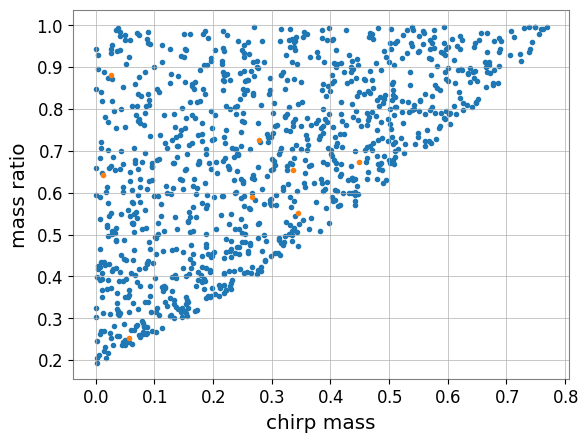

In [19]:
fig, ax = plt.subplots()
ax.plot(dt.X[:,0], dt.X[:,1], ".")
ax.plot(tdt.X[:,0], tdt.X[:,1], ".")
ax.set_xlabel("chirp mass")
ax.set_ylabel("mass ratio")

In [20]:
np.shape(dt[0][0])

(512, 3, 4096)

In [28]:
with h5py.File("/home/joseph.bayley/data/vitamin_tests/data_1024Hz_4s_gaussnoise_polarisation_mass/training/data_0_100000.0.h5py","r") as f:
    ypol = np.array(f["y_hplus_hcross"])

In [35]:
max(ypol[0][0])

(6.259583194770449e-23-2.6922458993717274e-24j)

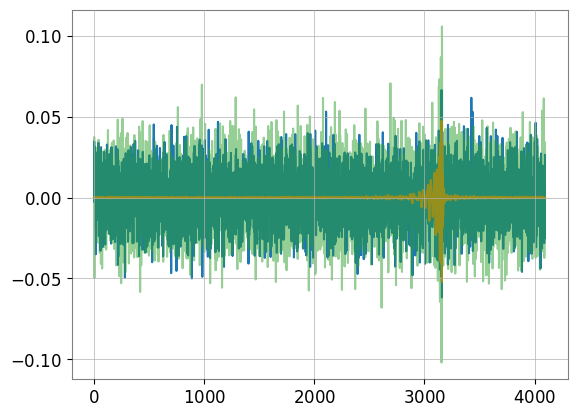

In [21]:
fig, ax = plt.subplots()
ax.plot(dt[0][0][28][0])
ax.plot(dt.Y_noisefree[28][0]/cfg["data"]["y_normscale"])
#ax.plot(np.real(np.fft.rfft(ypol[0][0]))*1e20)
#ax.plot(tdt.Y_noisefree[3][0]/cfg["data"]["y_normscale"])
ax.plot(np.array(tdt.Y_noisy[7])[0], alpha = 0.5)

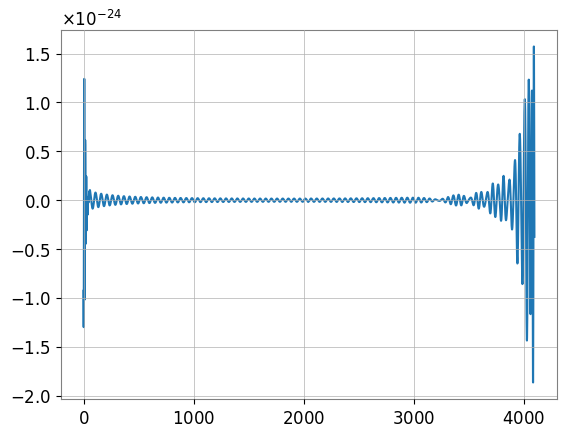

In [72]:
fig, ax = plt.subplots()
ax.plot(np.real(np.fft.irfft(ypol[6][0])))

In [14]:
np.shape(dt.X)

(1024, 2)

In [15]:
dt.X

array([[0.57188737, 0.88064622],
       [0.39429497, 0.62548461],
       [0.12991131, 0.36540939],
       ...,
       [0.57387454, 0.80503359],
       [0.04991221, 0.24925329],
       [0.75520848, 0.97881259]])

In [16]:
print(np.min(dv.X))

NameError: name 'dv' is not defined

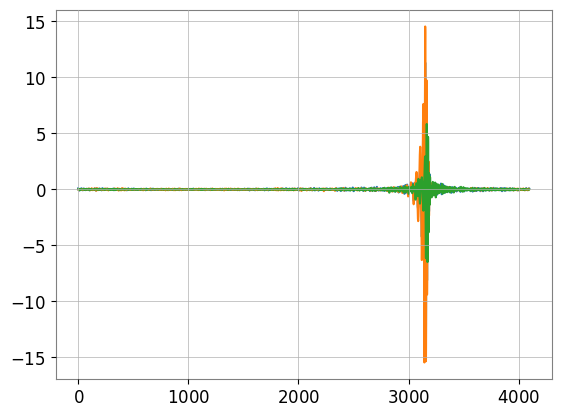

In [17]:
fig, ax = plt.subplots()
ax.plot(dt.Y_noisefree[0,:])

In [17]:
dat = dt[0]

In [18]:
np.shape(dat[0])

(512, 4096, 2)

In [19]:
np.where(np.max(dat[0]) == dat[0])

(array([490]), array([3007]), array([1]))

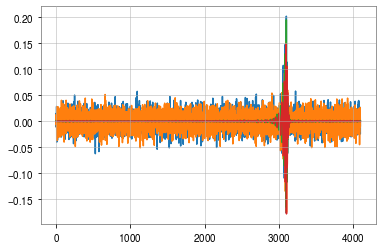

In [20]:
fig, ax = plt.subplots()
ax.plot(dat[0][0,:])
ax.plot(dt.Y_noisefree[0,:]/128)

In [77]:
[np.array(tdt.snrs[i]) for i in range(len(tdt.snrs))]

[array([2.70905747, 6.81605927]),
 array([10.92570155,  4.26923277]),
 array([1.05868762, 2.29707901]),
 array([10.68239758, 13.69967892]),
 array([ 8.84366047, 11.21180478]),
 array([17.48457605, 15.91403036]),
 array([17.420062  , 21.17235742]),
 array([22.84687027, 23.97465634]),
 array([14.09939415, 13.20619377]),
 array([19.42065505, 15.31768845]),
 array([20.59323814, 14.60293646]),
 array([4.88381683, 6.54319887]),
 array([7.03022974, 9.6822236 ]),
 array([ 9.8279999, 12.0035387]),
 array([11.24582224,  9.21573909]),
 array([7.31936707, 5.66680983])]

In [36]:
dv = vitamin.load_data.DataLoader(os.path.join(cfg["data"]["data_directory"], "validation"),cfg)

In [37]:
dv.load_next_chunk()

Reached maximum number of chunks, restarting index and shuffling files


/home/joseph.bayley/.local/lib/python3.7/site-packages/bilby/gw/detector/psd.py:362: RuntimeWarning: invalid value encountered in multiply
  frequency_domain_strain = self.__power_spectral_density_interpolated(frequencies) ** 0.5 * white_noise


load_time chunk 0: 1.277165412902832


In [42]:
len(dv)

2

In [41]:
dv[2]

(array([], shape=(0, 1024, 2), dtype=float32),
 array([], shape=(0, 15), dtype=float32))

In [18]:
dtest = vitamin.load_data.DataLoader(os.path.join(cfg["data"]["data_directory"], "test", "waveforms"),cfg, test_set=True)

In [19]:
dtest.load_next_chunk()

In [9]:
input_dir = "/home/joseph.bayley/data/CBC/O4MDC/validation_sets_realnoise_2det_15par_4096Hz_2s_widespin/tset_tot-1000_split-1000/"

In [3]:
filename = "data_61000-10000000.h5py"

In [12]:
with open(os.path.join(input_dir,filename),"r") as f:
    print(f)

<_io.TextIOWrapper name='/home/joseph.bayley/data/CBC/O4MDC/training_sets_realnoise_2det_15par_4096Hz_2s_widespin/tset_tot-10000000_split-1000/data_61000-10000000.h5py' mode='r' encoding='UTF-8'>


In [ ]:
data_453000-10000000.h5py

In [5]:
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

In [ ]:
for fname in os.listdir(input_dir):

    with h5py.File(os.path.join(input_dir,fname), 'r') as f:
        pass

In [13]:
os.listdir(input_dir)

[]

In [45]:
xdat = np.linspace(0,1,100)

In [98]:
s_arr = tf.transpose(tf.split(tf.transpose(tf.repeat(tf.sin(10*xdat[:,np.newaxis]), 6, axis = 1)), 2,axis = 0), (1,2,0))

In [99]:
s_arr.shape

TensorShape([3, 100, 2])

In [102]:
spl = tf.split(s_arr, 5, axis=1)
#spl_arr = tf.reshape(spl, (-1, 5, 20))
con_arr = tf.transpose(tf.squeeze(tf.concat(tf.expand_dims(spl, -1), axis = 2)), perm = (1,0,2, 3))
c_arr = tf.transpose(spl, (1,0,2, 3))

In [103]:
c_arr

<tf.Tensor: shape=(3, 5, 20, 2), dtype=float64, numpy=
array([[[[ 0.        ,  0.        ],
         [ 0.10083842,  0.10083842],
         [ 0.20064886,  0.20064886],
         [ 0.2984138 ,  0.2984138 ],
         [ 0.39313661,  0.39313661],
         [ 0.48385164,  0.48385164],
         [ 0.56963411,  0.56963411],
         [ 0.64960951,  0.64960951],
         [ 0.72296256,  0.72296256],
         [ 0.78894546,  0.78894546],
         [ 0.84688556,  0.84688556],
         [ 0.8961922 ,  0.8961922 ],
         [ 0.93636273,  0.93636273],
         [ 0.96698762,  0.96698762],
         [ 0.98775469,  0.98775469],
         [ 0.99845223,  0.99845223],
         [ 0.99897117,  0.99897117],
         [ 0.98930624,  0.98930624],
         [ 0.96955595,  0.96955595],
         [ 0.93992165,  0.93992165]],

        [[ 0.90070545,  0.90070545],
         [ 0.85230712,  0.85230712],
         [ 0.79522006,  0.79522006],
         [ 0.73002623,  0.73002623],
         [ 0.65739025,  0.65739025],
         [ 0.57805

In [67]:
spl_arr.shape

TensorShape([3, 20, 5])

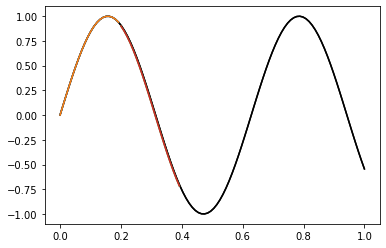

In [107]:
fig, ax = plt.subplots()
ax.plot(xdat,s_arr[0], "k")
#ax.plot(xdat[:20], spl_arr[0][0])
for i in range(2):
    ax.plot(xdat[:20] + i/5, c_arr[0][i])

In [110]:
with h5py.File("/home/joseph.bayley/data/CBC/O4MDC/test_sets/1024Hz_1s_full_15par_2det_fullparam/test_2_dynesty2/1024Hz_1s_full_15par_2det_fullparam_2_result.hdf5","r") as f:
    print(f.keys())

<KeysViewHDF5 ['__module__', '__name__', 'constraint_parameter_keys', 'fixed_parameter_keys', 'information_gain', 'injection_parameters', 'label', 'log_bayes_factor', 'log_evidence', 'log_evidence_err', 'log_likelihood_evaluations', 'log_noise_evidence', 'log_prior_evaluations', 'meta_data', 'nested_samples', 'outdir', 'parameter_labels', 'parameter_labels_with_unit', 'posterior', 'priors', 'sampler', 'sampler_kwargs', 'samples', 'sampling_time', 'search_parameter_keys', 'use_ratio', 'version']>


In [109]:
data

<Closed HDF5 file>

In [36]:
rdir = "/home/joseph.bayley/data/CBC/O4_2/data_1024Hz_4s_3det_gaussnoise_polarisation/validation/data_0_1000.0.h5py"

In [37]:
with h5py.File(rdir,"r") as f:
    print(f.keys())

<KeysViewHDF5 ['injection_parameters_keys', 'injection_parameters_values', 'snrs', 'y_hplus_hcross']>


In [ ]:
{f"p{i}_{bnd}":val for i in range(3) for bnd,val in zip(["min","max"], [0,1])}

In [18]:
fname = os.path.join(cfg["data"]["data_directory"], "training", 'data_17_10000000.0.h5py')
fnamet = os.path.join(cfg["data"]["data_directory"], "test", "waveforms",'test_data_0.h5py')

In [19]:
with h5py.File(fnamet, "r") as f:
    ynf = np.array(f["y_data_noisefree"])
    #injection_parameters_keys = [st.decode() for st in f['injection_parameters_keys']]
    #injection_parameters_values = np.array(f['injection_parameters_values'])

In [20]:
with h5py.File(fname, "r") as f:
    yhp = np.array(f["y_hplus_hcross"])
    injection_parameters_keys = [st.decode() for st in f['injection_parameters_keys']]
    injection_parameters_values = np.array(f['injection_parameters_values'])

In [21]:
np.shape(yhp[0])

(2, 2049)

In [22]:
ifos = bilby.gw.detector.InterferometerList(cfg.config["data"]['detectors'])
tdt.get_psd_for_ifo(ifos)

In [23]:
injection_parameters = {key: val[0] for key, val in zip(injection_parameters_keys, injection_parameters_values)}
                    
#injection_parameters["geocent_time"] += self.config["data"]["ref_geocent_time"]

Nt = cfg.config["data"]["sampling_frequency"]*cfg.config["data"]["duration"]
whitened_signals_td = []
polarisations = {"plus":yhp[0][0], "cross":yhp[0][1]}
for dt in range(len(cfg.config["data"]['detectors'])):
    ifos[dt].sampling_frequency=cfg.config["data"]["sampling_frequency"]
    ifos[dt].duration=cfg.config["data"]["duration"]
    ifos[dt].start_time=cfg.config["data"]["ref_geocent_time"] - cfg.config["data"]["duration"]/2

    signal_fd = ifos[dt].get_detector_response(polarisations, injection_parameters)
    whitened_signal_fd = signal_fd/ifos[dt].amplitude_spectral_density_array
    whitened_signal_td = np.sqrt(2.0*Nt)*np.fft.irfft(whitened_signal_fd)
    whitened_signals_td.append(whitened_signal_td)

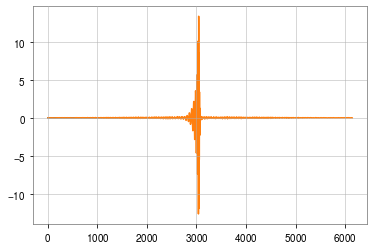

In [26]:
fig, ax = plt.subplots()
ax.plot(whitened_signals_td[0])
ax.plot(ynf[1])

In [4]:
with h5py.File("/home/joseph.bayley/data/vitamin_tests/data_1024Hz_4s_gaussnoise_polarisation_mass/test/waveforms/test_data_0.h5py","r") as f:
    print(f.keys())
    data = np.array(f["y_data_noisy"])

<KeysViewHDF5 ['frequency_domain_strain', 'injection_parameters_keys', 'injection_parameters_values', 'snrs', 'unwhitened_data_noisy', 'y_data_noisefree', 'y_data_noisy']>


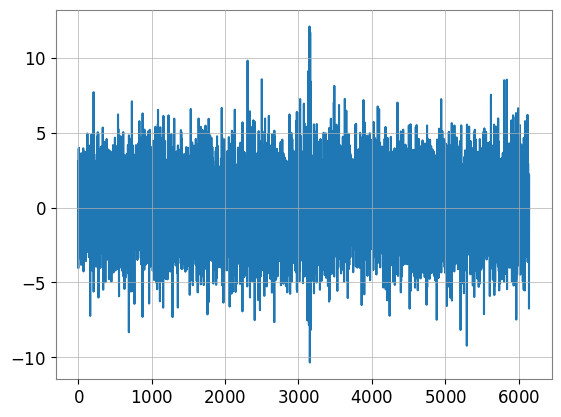

In [9]:
fig, ax = plt.subplots()
ax.plot(data[0])
plt.show()